In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Rosenbrock(point):
    return (1 - point[0])**2 + 100 * (point[1] - point[0]**2)**2

In [19]:
def calculate_grad(f,h,x):
    df_dx_i = []
    for x_i in range(x.shape[0]):
        h_vec = np.zeros(x.shape)
        h_vec[x_i,0] = h
        df_dx_i.append((f(x + h_vec) - f (x))/h)
    return np.array(df_dx_i).reshape(-1)

In [43]:
def calculate_hessian(f,h,x):
    d2f_dx2_i = []
    for x_i in range(x.shape[0]):
        h_vec = np.zeros(x.shape)
        h_vec[x_i,0] = h
        d2f_dx2_i.append((calculate_grad(f,h/2,x+h_vec)-calculate_grad(f,h/2,x)) / h)
    return np.array(d2f_dx2_i)

In [45]:
calculate_hessian(Rosenbrock ,0.00001,np.ones((2,1)))

array([[ 802.01800009, -400.00200001],
       [-400.00100001,  200.        ]])

# Task 1

In [144]:
def Newtone(f, h, x0, eps):
    xs = [x0]
    fs = [np.inf, f(x0)]
    while np.abs(fs[-1] - fs[-2]) > eps:
        grad = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1))
        hess = calculate_hessian(f,h,xs[-1].reshape((-1,1)))
        xs.append(xs[-1] - (np.linalg.inv(hess) @ grad).reshape(-1))
        fs.append(f(xs[-1]))
    return np.array(xs), np.array(fs[1:])

In [145]:
X, F = Newtone(Rosenbrock,10**-5,np.array([10,-10]),10**-5)

In [146]:
X[-1]

array([0.99701025, 0.99402441])

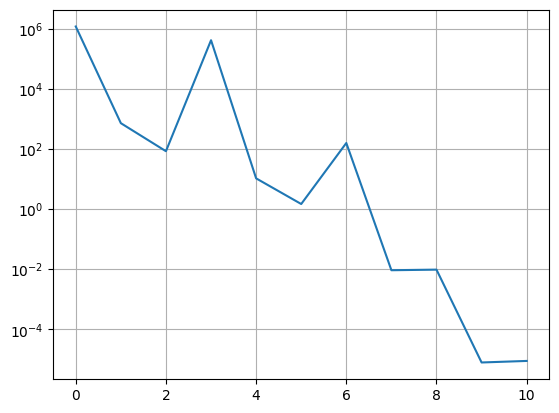

In [147]:
plt.plot(F)
plt.grid()
plt.yscale("log")

# Task 2

In [156]:
def Newtone_1(f, h, x0, eps):
    xs = [x0]
    fs = [np.inf, f(x0)]
    hess = calculate_hessian(f,h,xs[-1].reshape((-1,1)))
    while np.abs(fs[-1] - fs[-2]) > eps:
        grad = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1))
        xs.append(xs[-1] - (np.linalg.inv(hess) @ grad).reshape(-1))
        fs.append(f(xs[-1]))
    return np.array(xs[1:]), np.array(fs[1:])

In [157]:
X, F = Newtone_1(Rosenbrock,10**-5,np.array([1.5,1.5]),10**-5)

In [158]:
X[-1]

array([1.03282225, 1.06657529])

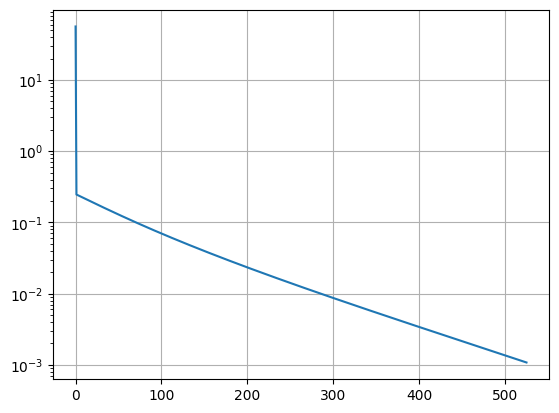

In [159]:
plt.plot(F)
plt.grid()
plt.yscale("log")

# Task 3

In [160]:
def Newtone_damp(f, h, x0, gamma, eps):
    xs = [x0]
    fs = [np.inf, f(x0)]
    while np.abs(fs[-1] - fs[-2]) > eps:
        grad = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1))
        hess = calculate_hessian(f,h,xs[-1].reshape((-1,1)))
        xs.append(xs[-1] - gamma * (np.linalg.inv(hess) @ grad).reshape(-1))
        fs.append(f(xs[-1]))
    return np.array(xs), np.array(fs[1:])

In [172]:
X, F = Newtone_damp(Rosenbrock,10**-5,np.array([10,10]),0.9,10**-5)

In [173]:
X[-1]

array([0.99768307, 0.99532174])

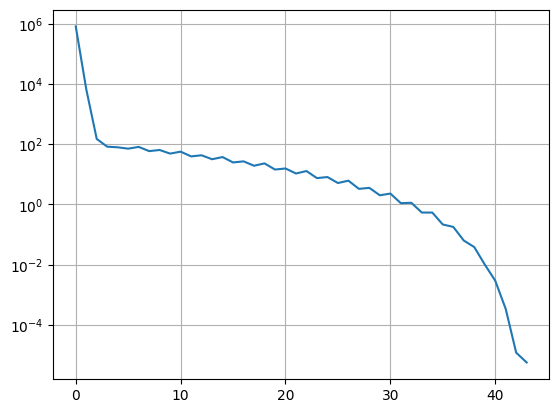

In [174]:
plt.plot(F)
plt.grid()
plt.yscale("log")

# Task 4

In [175]:
import scipy.optimize

In [176]:
def Newtone_quasi(f, h, x0, beta, eps):
    xs = [x0]
    fs = [np.inf, f(x0)]
    H = np.identity(x0.shape[0]) / beta
    grad = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1))
    alpha = scipy.optimize.minimize(lambda x: f(xs[-1] - (x*H@grad).reshape(-1)), 0).x[0]
    delta_x = - (alpha*H@grad).reshape(-1)
    xs.append(xs[-1] + delta_x)
    fs.append(f(xs[-1]))
    y = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1)) - grad
    while np.abs(fs[-1] - fs[-2]) > eps:
        H = H + (delta_x.reshape((-1,1)) - H@y) @ delta_x.reshape((1,-1))@H / (delta_x.reshape((1,-1))@H@y)
        grad = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1))
        alpha = scipy.optimize.minimize(lambda x: f(xs[-1] - (x*H@grad).reshape(-1)), 0).x[0]
        delta_x = - (alpha*H@grad).reshape(-1)
        xs.append(xs[-1] + delta_x)
        fs.append(f(xs[-1]))
        y = calculate_grad(f,h,xs[-1].reshape((-1,1))).reshape((-1,1)) - grad
    return np.array(xs), np.array(fs[1:])

In [182]:
X, F = Newtone_quasi(Rosenbrock,10**-5,np.array([1.5,1.5]),1,10**-5)

In [183]:
X[-1]

array([0.96452126, 0.93461776])

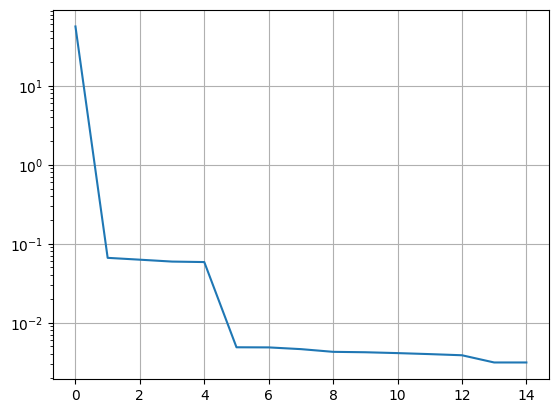

In [185]:
plt.plot(F)
plt.grid()
plt.yscale("log")